In [1]:
import pandas as pd
import seaborn as sns
print(pd.__version__)
print(sns.__version__)

1.4.4
0.12.0


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2022-12-05 12:12:16.353256: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-05 12:12:16.440074: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-05 12:12:16.440092: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-05 12:12:16.462726: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-05 12:12:16.854047: W tensorflow/stream_executor/platform/de

2.10.0


In [3]:
# Seaborn 내장 데이터 목록
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

내장데이터|설명
---|---
anagrams| 철자 순서를 바꾼 말
anscombe| 
attention|
brain_networks|브레인 네트워크
car_crashes| 자동차 충돌
diamonds|다이아몬드
dots|점들
dowjones| 
exercise|운동
flights|항공편
fmri|
geyser|
glue|
healthexp|
iris|아이리스 꽃 데이터
mpg| 자동차 연비 데이터
penguins|
planets|
seaice|
taxis| 택시요금 데이터
tips| 팁 데이터
titanic|

In [4]:
# ds=sns.load_dataset('anagrams')
# ds=sns.load_dataset('anscombe')
# ds=sns.load_dataset('attention')
# ds=sns.load_dataset('brain_networks')
# ds=sns.load_dataset('car_crashes')
# ds=sns.load_dataset('diamonds')
# ds=sns.load_dataset('dots')
# ds=sns.load_dataset('dowjones')
# ds=sns.load_dataset('flights')
# ds=sns.load_dataset('fmri')
# ds=sns.load_dataset('geyser')
# ds=sns.load_dataset('glue')
# ds=sns.load_dataset('healthexp')
# ds=sns.load_dataset('iris')
ds=sns.load_dataset('mpg')
# ds=sns.load_dataset('penguins')
# ds=sns.load_dataset('seaice')
# ds=sns.load_dataset('taxis')
# ds=sns.load_dataset('tips')
# ds=sns.load_dataset('titanic')
ds.shape

(398, 9)

In [5]:
ds.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
ds.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [7]:
ds[ds['horsepower'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [8]:
ds=ds.dropna()

In [9]:
ds.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
43,13.0,8,400.0,170.0,4746,12.0,71,usa,ford country squire (sw)
113,21.0,6,155.0,107.0,2472,14.0,73,usa,mercury capri v6
329,44.6,4,91.0,67.0,1850,13.8,80,japan,honda civic 1500 gl
231,15.5,8,400.0,190.0,4325,12.2,77,usa,chrysler cordoba
254,20.2,6,200.0,85.0,2965,15.8,78,usa,ford fairmont (auto)
242,21.5,4,121.0,110.0,2600,12.8,77,europe,bmw 320i
391,36.0,4,135.0,84.0,2370,13.0,82,usa,dodge charger 2.2
338,27.2,4,135.0,84.0,2490,15.7,81,usa,plymouth reliant
180,25.0,4,121.0,115.0,2671,13.5,75,europe,saab 99le
280,21.5,6,231.0,115.0,3245,15.4,79,usa,pontiac lemans v6


In [10]:
ds.pop('name')

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: name, Length: 392, dtype: object

In [11]:
origin=ds.pop('origin')

In [12]:
ds['usa']=(origin=='usa') * 1.0
ds['eruope']=(origin=='europe') * 1.0
ds['japan']=(origin=='japan') * 1.0
ds.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,usa,eruope,japan
393,27.0,4,140.0,86.0,2790,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720,19.4,82,1.0,0.0,0.0


In [13]:
trds=ds.sample(frac=0.8,random_state=(42))
teds=ds.drop(trds.index)

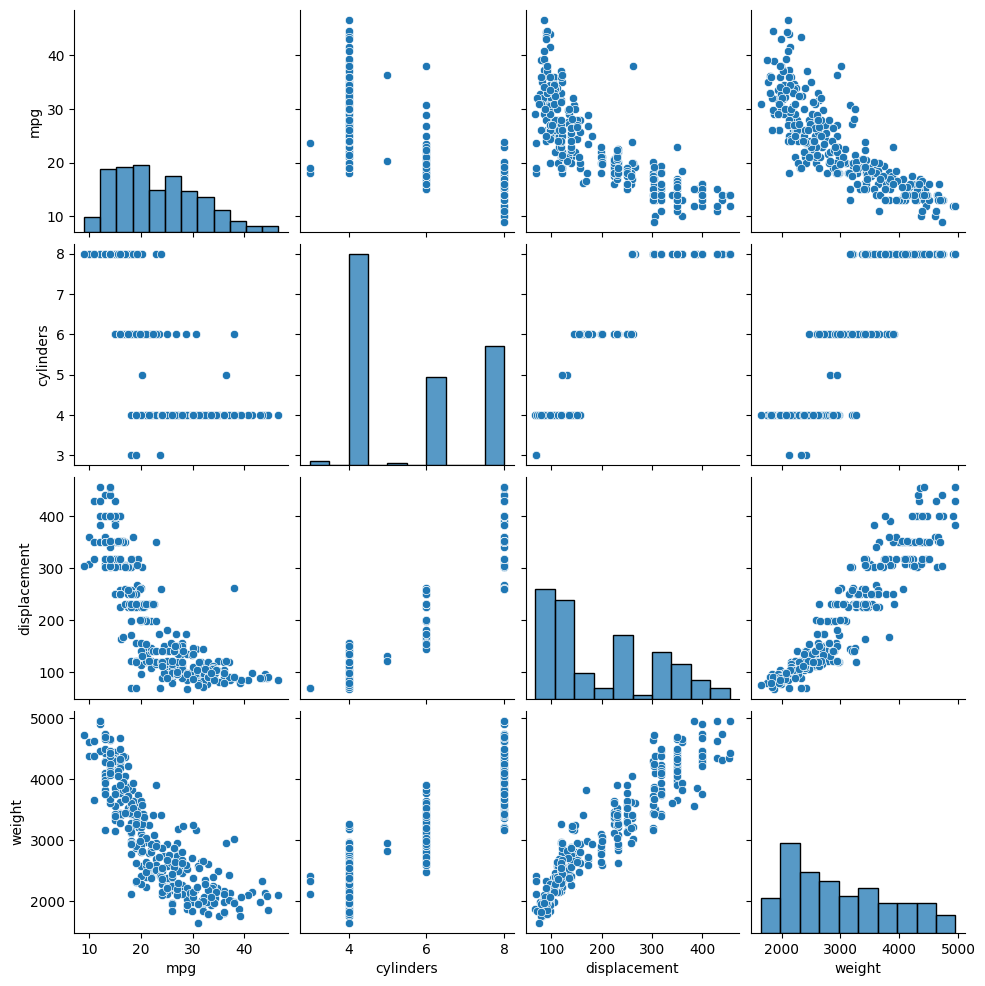

In [14]:
sns.pairplot(trds[['mpg','cylinders','displacement','weight']])

In [15]:
trst=trds.describe()
trst.pop('mpg')
trst

,cylinders,displacement,horsepower,weight,acceleration,model_year,usa,eruope,japan
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,5.531847,197.855096,105.971338,3005.745223,15.510828,75.910828,0.624204,0.171975,0.203822
std,1.729449,106.501896,39.636557,859.060925,2.803560,3.688989,0.485101,0.377961,0.403481
min,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,4.000000,105.000000,76.000000,2231.000000,13.625000,73.000000,0.000000,0.000000,0.000000
50%,4.000000,151.000000,95.000000,2831.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,8.000000,302.000000,130.000000,3641.750000,17.000000,79.000000,1.000000,0.000000,0.000000
max,8.000000,455.000000,230.000000,4955.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [16]:
trst=trst.transpose()
trst

,count,mean,std,min,25%,50%,75%,max
cylinders,314.0,5.531847,1.729449,3.0,4.000,4.0,8.00,8.0
displacement,314.0,197.855096,106.501896,68.0,105.000,151.0,302.00,455.0
horsepower,314.0,105.971338,39.636557,46.0,76.000,95.0,130.00,230.0
weight,314.0,3005.745223,859.060925,1649.0,2231.000,2831.5,3641.75,4955.0
acceleration,314.0,15.510828,2.803560,8.0,13.625,15.5,17.00,24.8
model_year,314.0,75.910828,3.688989,70.0,73.000,76.0,79.00,82.0
usa,314.0,0.624204,0.485101,0.0,0.000,1.0,1.00,1.0
eruope,314.0,0.171975,0.377961,0.0,0.000,0.0,0.00,1.0
japan,314.0,0.203822,0.403481,0.0,0.000,0.0,0.00,1.0


In [17]:
trla=trds.pop('mpg')
tela=teds.pop('mpg')

In [18]:
trla.tail()

218    36.0
281    19.8
342    30.0
238    33.5
209    19.0
Name: mpg, dtype: float64

In [19]:
def norm(x):
    return(x-trst['mean'])/trst['std']
notrd=norm(trds)
noted=norm(teds)

In [20]:
len(trds.keys())

9

In [21]:
def build_model():
	model=keras.Sequential([
		layers.Dense(64, input_shape=[len(trds.keys())], activation='relu'),
		layers.Dense(64,activation='relu'),
		layers.Dense(1)
	])
	optimizer=tf.keras.optimizers.RMSprop(0.001)
	model.compile(loss='mse',optimizer=optimizer, metrics=['mae','mse'])
	return model

In [22]:
model=build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


2022-12-05 12:38:33.966416: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-05 12:38:33.966628: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-05 12:38:33.966679: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-12-05 12:38:33.966770: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-12-05 12:38:33.966846: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [23]:
class PrintDot(keras.callbacks.Callback):
	def on_epoch_end(self,epoch,logs):
		if epoch%100==0:print('')
		print(',',end='')
EPOCHS=1000
model=build_model()
history=model.fit(notrd,trla,epochs=EPOCHS,validation_split=0.2,verbose=0,callbacks=[PrintDot()])


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [24]:
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.131746,0.940958,2.131746,5.613199,1.865671,5.613199,995
996,2.432451,1.004627,2.432451,4.842952,1.778653,4.842952,996
997,2.276524,0.989248,2.276524,4.892968,1.788236,4.892968,997
998,2.235155,0.980089,2.235155,5.005258,1.842811,5.005258,998
999,2.228049,0.970834,2.228049,4.943866,1.811972,4.943866,999


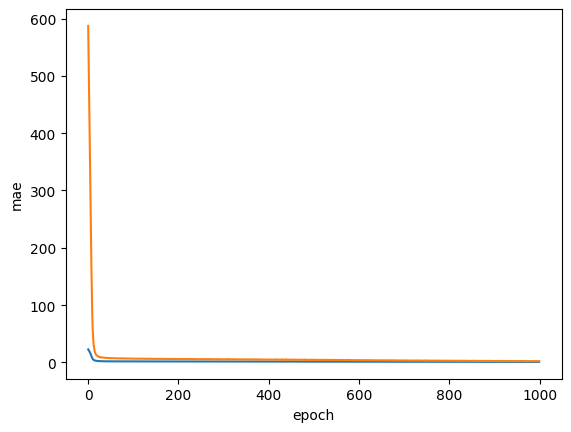

In [25]:
def sns_hist(history):
	hist=pd.DataFrame(history.history)
	hist['epoch']=history.epoch
	sns.lineplot(data=hist,x='epoch',y='mae')
	sns.lineplot(data=hist,x='epoch',y='mse')
sns_hist(history)

In [26]:
model = build_model()
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history=model.fit(notrd, trla, epochs=EPOCHS, validation_split=0.2, verbose=0, callbacks=[PrintDot(),early_stop])


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

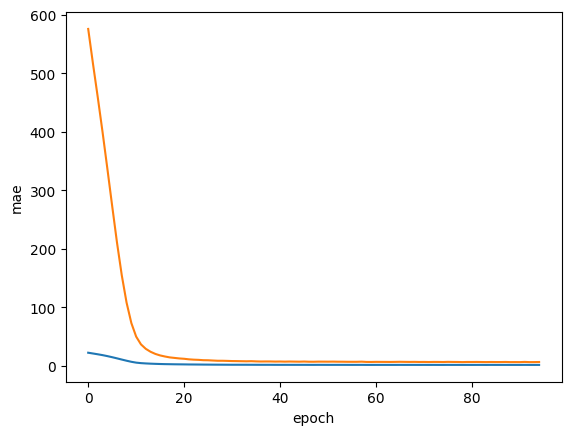

In [28]:
sns_hist(history)

In [29]:
loss, mae,mse=model.evaluate(noted,tela,verbose=2)
print('테스트 세트의 평균 절대 오차: {:.2f} MPG'.format(mae))

3/3 - 0s - loss: 6.8659 - mae: 1.9318 - mse: 6.8659 - 20ms/epoch - 7ms/step
테스트 세트의 평균 절대 오차: 1.93 MPG


In [30]:
test_predictions=model.predict(noted).flatten()
test_predictions

3/3 [==============================] - 0s 994us/step


array([14.799357 , 14.44599  , 20.178274 , 22.267424 , 17.740152 ,
       13.033499 , 25.627195 , 23.924932 , 25.042107 , 29.37225  ,
       29.745771 , 26.268503 , 26.253782 , 14.404911 , 23.558115 ,
       14.104167 , 14.587523 , 13.385938 , 18.643934 , 13.179204 ,
       13.103614 , 18.841537 , 20.535872 , 22.419909 , 14.3300905,
       27.307995 , 17.369867 , 15.904517 , 16.460377 , 21.69537  ,
       21.52944  , 18.412134 , 16.16891  , 15.038489 , 18.938015 ,
       18.495493 , 19.490202 , 30.855003 , 20.035688 , 15.660819 ,
       30.856245 , 25.282549 , 29.72159  , 23.641657 , 33.647316 ,
       19.07713  , 21.724161 , 20.790352 , 19.057579 , 16.942135 ,
       29.809092 , 21.507608 , 22.025719 , 19.710327 , 31.546162 ,
       32.431538 , 23.598463 , 24.424072 , 27.25095  , 35.568417 ,
       32.361843 , 22.84355  , 32.785034 , 31.74287  , 33.616905 ,
       21.599092 , 36.290104 , 35.892902 , 30.529556 , 23.475466 ,
       23.309942 , 23.855349 , 35.467144 , 34.245975 , 28.5735

<AxesSubplot:xlabel='mpg'>

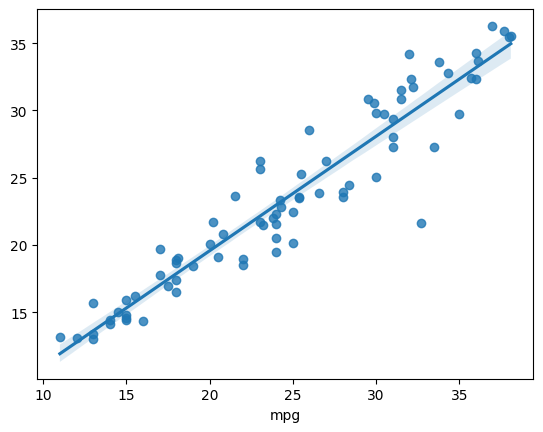

In [32]:
sns.regplot(x=tela,y=test_predictions)

<AxesSubplot:xlabel='mpg'>

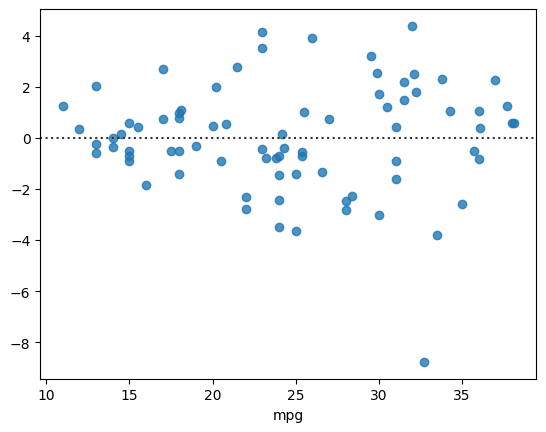

In [36]:
sns.residplot(x=tela,y=test_predictions)

In [34]:
error=test_predictions-tela
error.tail()

381   -1.754025
388    2.573572
391   -3.660133
395    2.170284
397   -2.975878
Name: mpg, dtype: float64

<AxesSubplot:>

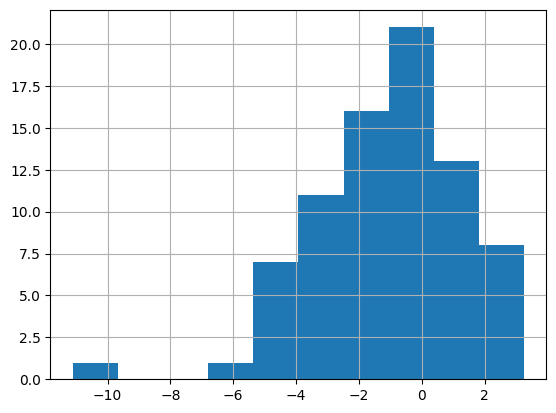

In [35]:
error.hist()